# Tensorflow Keras Boston House Data

#### Disable Tensorflow Warnings

In [17]:
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed 
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#### Import der Bibliotheken

In [18]:
import numpy as np
import pandas as pd
import os
import importlib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.datasets import boston_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [19]:
# Import weiterer py-files, Aufruf mit utils.xyz
!wget -O utils.py https://raw.githubusercontent.com/dsbademo/DSBA/main/utils.py
utils = importlib.import_module("utils", "./utils.py")

--2022-10-18 16:10:01--  https://raw.githubusercontent.com/dsbademo/DSBA/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2384 (2.3K) [text/plain]
Saving to: 'utils.py'

utils.py            100%[===================>]   2.33K  --.-KB/s    in 0s      

2022-10-18 16:10:02 (12.2 MB/s) - 'utils.py' saved [2384/2384]



#### Laden der Daten

In [20]:
header_list = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_houses = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', names = header_list, sep='\s+')

#### Exploration der Daten

In [21]:
df_houses.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


####  Train und Test Data

In [22]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [23]:
print(train_data.shape)
print(test_data.shape)
print(train_targets[0:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


#### Standardisierung der Daten

In [24]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### Baseline NN-Modell

In [25]:
def baseline_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
    return model

#### Large NN-Modell

In [26]:
def larger_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
    return model

#### Training

In [27]:
num_epochs = 50

In [28]:
network = baseline_model()
baseline_history = network.fit(train_data, train_targets, epochs=num_epochs, batch_size=1, verbose=1, validation_data=(test_data, test_targets))

Epoch 1/50
404/404 [==============================] - 2s 4ms/step - loss: 404.4759 - mse: 404.4759 - mae: 17.8959 - val_loss: 234.6570 - val_mse: 234.6570 - val_mae: 12.9206
Epoch 2/50
404/404 [==============================] - 1s 4ms/step - loss: 108.6194 - mse: 108.6194 - mae: 7.4222 - val_loss: 77.0975 - val_mse: 77.0975 - val_mae: 6.6707
Epoch 3/50
404/404 [==============================] - 1s 4ms/step - loss: 49.3794 - mse: 49.3794 - mae: 4.6036 - val_loss: 49.9808 - val_mse: 49.9808 - val_mae: 5.3227
Epoch 4/50
404/404 [==============================] - 1s 4ms/step - loss: 35.0293 - mse: 35.0293 - mae: 3.8122 - val_loss: 32.6358 - val_mse: 32.6358 - val_mae: 4.3795
Epoch 5/50
404/404 [==============================] - 1s 4ms/step - loss: 27.3729 - mse: 27.3729 - mae: 3.3168 - val_loss: 24.6668 - val_mse: 24.6668 - val_mae: 3.7844
Epoch 6/50
404/404 [==============================] - 1s 4ms/step - loss: 23.2930 - mse: 23.2930 - mae: 3.1267 - val_loss: 21.6984 - val_mse: 21.6984 - 

Epoch 50/50
404/404 [==============================] - 1s 4ms/step - loss: 7.8023 - mse: 7.8023 - mae: 1.8023 - val_loss: 20.3436 - val_mse: 20.3436 - val_mae: 2.7520


In [29]:
network = larger_model()
large_history = network.fit(train_data, train_targets, epochs=num_epochs, batch_size=1, verbose=1, validation_data=(test_data, test_targets))

Epoch 1/50
404/404 [==============================] - 2s 4ms/step - loss: 144.2574 - mse: 144.2574 - mae: 8.7313 - val_loss: 29.0790 - val_mse: 29.0790 - val_mae: 4.3368
Epoch 2/50
404/404 [==============================] - 2s 4ms/step - loss: 25.8801 - mse: 25.8801 - mae: 3.4054 - val_loss: 20.4594 - val_mse: 20.4594 - val_mae: 3.4291
Epoch 3/50
404/404 [==============================] - 2s 4ms/step - loss: 18.5722 - mse: 18.5722 - mae: 2.8970 - val_loss: 21.3173 - val_mse: 21.3173 - val_mae: 3.2575
Epoch 4/50
404/404 [==============================] - 2s 4ms/step - loss: 15.2399 - mse: 15.2399 - mae: 2.6529 - val_loss: 21.4718 - val_mse: 21.4718 - val_mae: 3.1187
Epoch 5/50
404/404 [==============================] - 2s 4ms/step - loss: 13.7318 - mse: 13.7318 - mae: 2.4902 - val_loss: 22.8498 - val_mse: 22.8498 - val_mae: 3.2581
Epoch 6/50
404/404 [==============================] - 2s 4ms/step - loss: 12.4965 - mse: 12.4965 - mae: 2.4437 - val_loss: 22.6252 - val_mse: 22.6252 - val_ma

Epoch 50/50
404/404 [==============================] - 2s 4ms/step - loss: 5.4255 - mse: 5.4255 - mae: 1.5993 - val_loss: 15.9310 - val_mse: 15.9310 - val_mae: 2.4962


In [30]:
print(baseline_history.history['loss'][0:5])
print(large_history.history['loss'][0:5])

[404.4758605957031, 108.61936950683594, 49.379364013671875, 35.02928161621094, 27.37294578552246]
[144.25741577148438, 25.880138397216797, 18.572229385375977, 15.239906311035156, 13.73183536529541]


#### Small Model

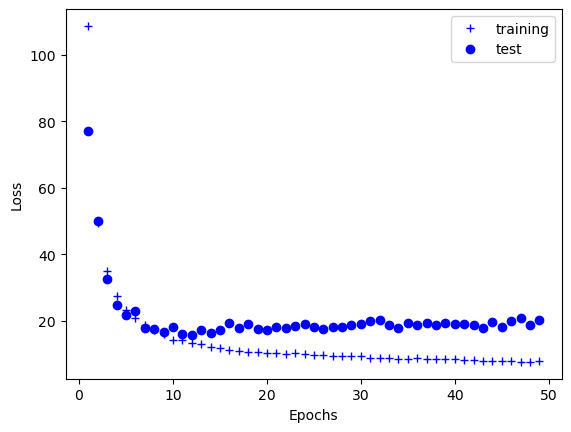

In [31]:
base_loss = baseline_history.history['loss']
base_val_loss = baseline_history.history['val_loss']
utils.plot_history(base_loss, base_val_loss, 'training', 'test')

#### Large Model

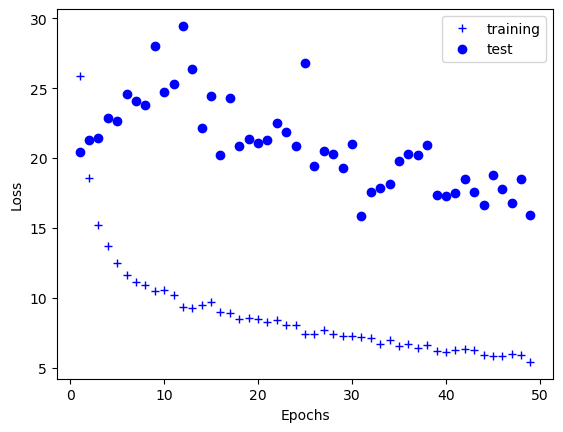

In [32]:
large_loss = large_history.history['loss']
large_val_loss = large_history.history['val_loss']
utils.plot_history(large_loss, large_val_loss, 'training', 'test')